# Pipeline imagenes de Difusión

In [1]:
import warnings
warnings.filterwarnings('ignore')
from niwidgets import NiftiWidget
import os
from time import time

## Visualización Imagen estructural T1

El valor de path debe ser la dirección de la imagen estructural T1

In [2]:
folder="/home/cpulido/all/DWI/a/"

In [3]:
path_t1=os.path.join(folder,"T1.nii.gz")

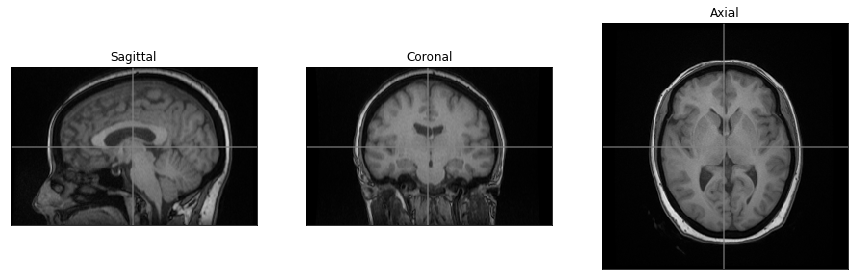

In [4]:
NiftiWidget(path_t1).nifti_plotter(colormap='gray')

## Visualización Imagen de Difusión

El valor de path debe ser la dirección de la imagen DWI

In [5]:
path_dwi=os.path.join(folder,"TENSOR.nii.gz")

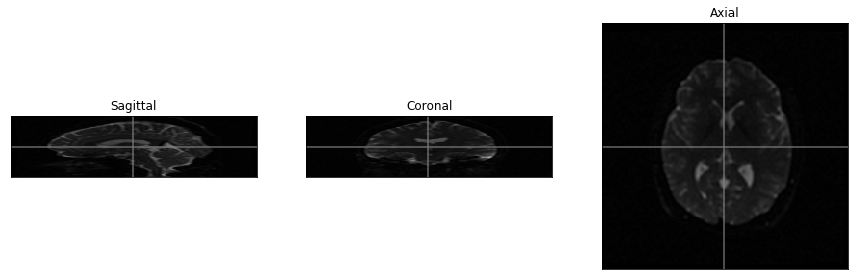

In [6]:
NiftiWidget(path_dwi).nifti_plotter(colormap='gray')

## eddy_correction

### Corrección de corrientes de eddy generadas en la adquisición de las imágenes debido al campo magnetico del resonador

In [28]:
warnings.filterwarnings('ignore')
start_time = time()
%run tareas/eddy_correction.py "/home/runlab/scripts/cristian/test/TENSOR.nii.gz" "/home/runlab/scripts/cristian/test"
elapsed_time = time() - start_time
print("Elapsed time: %0.10f seconds." % elapsed_time)

    - running Eddy Correction...
/home/runlab/scripts/cristian/test/TENSOR_EddyCorrect.nii.gz
Elapsed time: 0.2735996246 seconds.


## Non Local Mean

### Proceso que permite quitar el ruido de la imagen

### ejecutando desde terminal

In [13]:
warnings.filterwarnings('ignore')
start_time = time()
%run tareas/nonLocalMean.py "/home/cpulido/all/DWI/a/TENSOR.nii.gz" "/home/cpulido/all/DWI/a/"
elapsed_time = time() - start_time
print("Elapsed time: %0.10f seconds." % elapsed_time)

    - running NonLocal Mean algoritm...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
/home/cpulido/all/DWI/a/TENSOR_NonLocalMean.nii.gz
Elapsed time: 594.9824860096 seconds.


### ejecutando desde python

In [16]:
from tareas.nonLocalMean import run_nonLocalMean
out_non_local=run_nonLocalMean(path_input=path_dwi,
                               path_output=folder)


    - running NonLocal Mean algoritm...


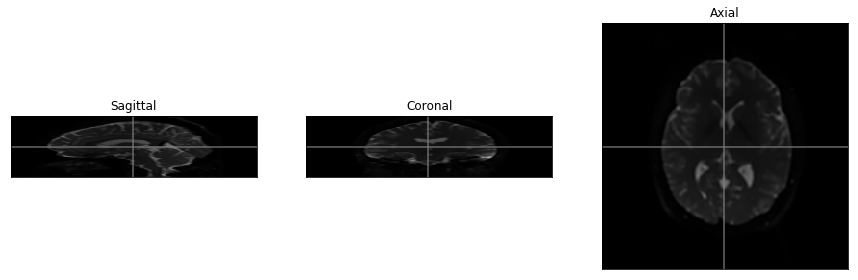

In [15]:
out="/home/cpulido/all/DWI/test/TENSOR_NonLocalMean.nii.gz"
NiftiWidget(out).nifti_plotter(colormap='gray')

## Reslicing
###  Redimensiona los voxeles de la imagenen de tal forma que queda isotropico

### ejecutando desde terminal

In [7]:
warnings.filterwarnings('ignore')
start_time = time()
%run tareas/reslicing.py "/home/cpulido/all/DWI/test/TENSOR_NonLocalMean.nii.gz" "/home/cpulido/all/DWI/test/"
elapsed_time = time() - start_time
print("Elapsed time: %0.10f seconds." % elapsed_time)

    - runnning Reslice...
/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice.nii.gz
Elapsed time: 86.8495440483 seconds.


### ejecutando desde python

In [19]:
from tareas.reslicing import run_reslicing
out_reslicing=run_reslicing(path_input=out_non_local,
                            path_output=folder)
out_reslicing

    - runnning Reslice...


'/home/cpulido/all/DWI/a/TENSOR_NonLocalMean_Reslice.nii.gz'

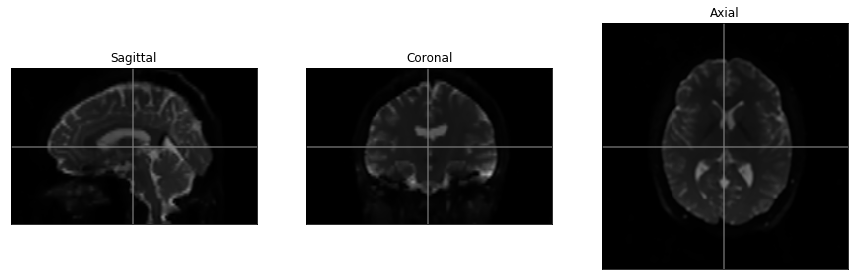

In [20]:
out="/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice.nii.gz"
NiftiWidget(out_reslicing).nifti_plotter(colormap='gray')

## Bet DWI
### Extrae el cerebro de la imagen

### ejecutando desde terminal

In [9]:
warnings.filterwarnings('ignore')
start_time = time()
%run tareas/betDWI.py "/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice.nii.gz" "/home/cpulido/all/DWI/test/"
elapsed_time = time() - start_time
print("Elapsed time: %0.10f seconds." % elapsed_time)

    - running BET with FSL...
Ejecutando
/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice_BET_dwi_masked.nii.gz
Elapsed time: 30.1716310978 seconds.


### ejecutando desde python

In [21]:
from tareas.betDWI import run_betDWI
out_bet=run_betDWI(path_input=out_reslicing,
                   path_output=folder)
out_bet

    - running BET with FSL...
Ejecutando


'/home/cpulido/all/DWI/a/TENSOR_NonLocalMean_Reslice_BET_dwi_masked.nii.gz'

## to_register_dwi_to_mni

### ejecutando desde terminal

In [10]:
warnings.filterwarnings('ignore')
start_time = time()
%run tareas/to_register_dwi_to_mni.py "/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice_BET_dwi_masked.nii.gz" "/home/cpulido/all/DWI/test/"
elapsed_time = time() - start_time
print("Elapsed time: %0.10f seconds." % elapsed_time)

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
NO Data time
terminado affine registartion
Creating scale space from the moving image. Levels: 3. Sigma factor: 0.200000.
Creating scale space from the static image. Levels: 3. Sigma factor: 0.200000.
Optimizing level 2
Optimizing level 1
Optimizing level 0
terminado syn registartion
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice_BET_dwi_masked_normalized.nii.gz
/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice_BET_dwi_masked.nii.gz
Elapsed time: 1085.5715253353 seconds.


### ejecutando desde python

In [23]:
from tareas.to_register_dwi_to_mni import run_to_register_dwi_to_mni
out_dwi2mni=run_to_register_dwi_to_mni(path_input=out_bet,
                       path_output=folder)
out_dwi2mni

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
NO Data time
terminado affine registration
Creating scale space from the moving image. Levels: 3. Sigma factor: 0.200000.
Creating scale space from the static image. Levels: 3. Sigma factor: 0.200000.
Optimizing level 2
Optimizing level 1
Optimizing level 0
terminado syn registration
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
/home/cpulido/all/DWI/a/TENSOR_NonLocalMean_Reslice_BET_dwi_masked_normalized.nii.gz


'/home/cpulido/all/DWI/a/TENSOR_NonLocalMean_Reslice_BET_dwi_masked.nii.gz'

## To estimate dti

### ejecutando desde terminal

In [11]:
warnings.filterwarnings('ignore')
start_time = time()
%run tareas/to_estimate_dti.py "/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice_BET_dwi_masked.nii.gz" "/home/cpulido/all/DWI/test/"
elapsed_time = time() - start_time
print("Elapsed time: %0.10f seconds." % elapsed_time)

    - building DTI Model...
Unexpected error: <class 'FileNotFoundError'>
/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice_BET_dwi_masked_DTIEvecs.nii.gz
/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice_BET_dwi_masked_DTIEvals.nii.gz
/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice_BET_dwi_masked.nii.gz
Elapsed time: 81.2918457985 seconds.


### ejecutando desde python

In [25]:
from tareas.to_estimate_dti import run_to_estimate_dti
out_dti=run_to_estimate_dti(path_input=out_dwi2mni,
                            path_output=folder)
out_dti

    - building DTI Model...
Unexpected error: <class 'FileNotFoundError'>
/home/cpulido/all/DWI/a/TENSOR_NonLocalMean_Reslice_BET_dwi_masked_DTIEvecs.nii.gz
/home/cpulido/all/DWI/a/TENSOR_NonLocalMean_Reslice_BET_dwi_masked_DTIEvals.nii.gz
/home/cpulido/all/DWI/a/TENSOR_NonLocalMean_Reslice_BET_dwi_masked.nii.gz


'/home/cpulido/all/DWI/a/TENSOR_NonLocalMean_Reslice_BET_dwi_masked.nii.gz'

## To_estimate_dti_maps

### ejecutando desde terminal

In [12]:
warnings.filterwarnings('ignore')
start_time = time()
%run tareas/to_estimate_dti_maps.py "/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice_BET_dwi_masked.nii.gz" "/home/cpulido/all/DWI/test/"
elapsed_time = time() - start_time
print("Elapsed time: %0.10f seconds." % elapsed_time)

    -     - computing of FA map
    -     - computing of Color FA map
    -     - computing of MD map
    -     - computing of AD map
    -     - computing of RD map
['/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice_BET_dwi_masked_FA.nii.gz', '/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice_BET_dwi_masked_MD.nii.gz', '/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice_BET_dwi_masked_AD.nii.gz', '/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice_BET_dwi_masked_RD.nii.gz']
/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice_BET_dwi_masked.nii.gz
Elapsed time: 50.8595564365 seconds.


### ejecutando desde python

In [28]:
from tareas.to_estimate_dti_maps import run_to_estimate_dti_maps
out_dti_maps=run_to_estimate_dti_maps(path_input=out_dti,
                                      path_output=folder)
out_dti_maps

    -     - computing of FA map
    -     - computing of Color FA map
    -     - computing of MD map
    -     - computing of AD map
    -     - computing of RD map
['/home/cpulido/all/DWI/a/TENSOR_NonLocalMean_Reslice_BET_dwi_masked_FA.nii.gz', '/home/cpulido/all/DWI/a/TENSOR_NonLocalMean_Reslice_BET_dwi_masked_MD.nii.gz', '/home/cpulido/all/DWI/a/TENSOR_NonLocalMean_Reslice_BET_dwi_masked_AD.nii.gz', '/home/cpulido/all/DWI/a/TENSOR_NonLocalMean_Reslice_BET_dwi_masked_RD.nii.gz']


'/home/cpulido/all/DWI/a/TENSOR_NonLocalMean_Reslice_BET_dwi_masked.nii.gz'

## to generate bunddle

### ejecutando desde terminal

In [3]:
warnings.filterwarnings('ignore')
start_time = time()
%run tareas/to_generate_bunddle.py "/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice_BET_dwi_masked.nii.gz" "/home/cpulido/all/DWI/test/"
elapsed_time = time() - start_time
print("Elapsed time: %0.10f seconds." % elapsed_time)

    - starting of model
    - ending of model
    - starting of classifier
    - ending of classifier
Starting ROI reconstruction
Finished ROI reconstruction
Starting TARGET filtering
Finished TARGET filtering
Finished exclusive filtering:
Starting ROI reconstruction
Finished ROI reconstruction
Starting TARGET filtering
Finished TARGET filtering
Starting ROI reconstruction
Finished ROI reconstruction
Starting TARGET filtering
Finished TARGET filtering


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



/home/cpulido/all/DWI/test/AAN_ROI_3.0.nii.gz
Morel
/home/cpulido/all/DWI/test/ThalamicNucleiMorelAtlas_ROI_4.0.nii.gz
/home/cpulido/all/DWI/test/ThalamicNucleiMorelAtlas_ROI_5.0.nii.gz
/home/cpulido/all/DWI/test/ThalamicNucleiMorelAtlas_ROI_6.0.nii.gz
/home/cpulido/all/DWI/test/ThalamicNucleiMorelAtlas_ROI_18.0.nii.gz
/home/cpulido/all/DWI/test/ThalamicNucleiMorelAtlas_ROI_42.0.nii.gz
/home/cpulido/all/DWI/test/ThalamicNucleiMorelAtlas_ROI_43.0.nii.gz
/home/cpulido/all/DWI/test/ThalamicNucleiMorelAtlas_ROI_44.0.nii.gz
/home/cpulido/all/DWI/test/ThalamicNucleiMorelAtlas_ROI_56.0.nii.gz
HypothalamusAtlas
/home/cpulido/all/DWI/test/Hypothalamus_ROI_1.0.nii.gz
/home/cpulido/all/DWI/test/Hypothalamus_ROI_2.0.nii.gz
/home/cpulido/all/DWI/test/Hypothalamus_ROI_3.0.nii.gz
/home/cpulido/all/DWI/test/feature.out
/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice_BET_dwi_masked.nii.gz
Elapsed time: 712.6888489723 seconds.


### ejecutando desde python

In [30]:
from tareas.to_generate_bunddle import run_to_generate_bunddle
out_bunddle=run_to_generate_bunddle(path_input=out_dti_maps,
                                    path_output=folder)
out_bunddle

/home/cpulido/all/Envs/dwi/lib/python3.6/site-packages/dipy/io/trackvis.py:11: DeprecationWarning: The `dipy.io.trackvis` module is deprecated as of version 0.14 of Dipy and will be removed in a future version. Please use `dipy.io.streamline` module instead
  DeprecationWarning)


    - starting of model
    - ending of model
    - starting of classifier
    - ending of classifier
Starting ROI reconstruction
Finished ROI reconstruction
Starting TARGET filtering
Finished TARGET filtering
Finished exclusive filtering:
Starting ROI reconstruction


/home/cpulido/all/Envs/dwi/lib/python3.6/site-packages/dipy/io/trackvis.py:22: DeprecationWarning: The `dipy.io.trackvis.save_trk` function is deprecated as of version 0.14 of Dipy and will be removed in a future version. Please use `dipy.io.streamline.save_trk` function instead
  DeprecationWarning)


Finished ROI reconstruction
Starting TARGET filtering
Finished TARGET filtering
Starting ROI reconstruction


/home/cpulido/all/Envs/dwi/lib/python3.6/site-packages/dipy/io/trackvis.py:22: DeprecationWarning: The `dipy.io.trackvis.save_trk` function is deprecated as of version 0.14 of Dipy and will be removed in a future version. Please use `dipy.io.streamline.save_trk` function instead
  DeprecationWarning)


Finished ROI reconstruction
Starting TARGET filtering
Finished TARGET filtering


/home/cpulido/all/Envs/dwi/lib/python3.6/site-packages/dipy/io/trackvis.py:22: DeprecationWarning: The `dipy.io.trackvis.save_trk` function is deprecated as of version 0.14 of Dipy and will be removed in a future version. Please use `dipy.io.streamline.save_trk` function instead
  DeprecationWarning)
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



/home/cpulido/all/DWI/a/AAN_ROI_3.0.nii.gz
Morel
/home/cpulido/all/DWI/a/ThalamicNucleiMorelAtlas_ROI_4.0.nii.gz
/home/cpulido/all/DWI/a/ThalamicNucleiMorelAtlas_ROI_5.0.nii.gz
/home/cpulido/all/DWI/a/ThalamicNucleiMorelAtlas_ROI_6.0.nii.gz
/home/cpulido/all/DWI/a/ThalamicNucleiMorelAtlas_ROI_18.0.nii.gz
/home/cpulido/all/DWI/a/ThalamicNucleiMorelAtlas_ROI_42.0.nii.gz
/home/cpulido/all/DWI/a/ThalamicNucleiMorelAtlas_ROI_43.0.nii.gz
/home/cpulido/all/DWI/a/ThalamicNucleiMorelAtlas_ROI_44.0.nii.gz
/home/cpulido/all/DWI/a/ThalamicNucleiMorelAtlas_ROI_56.0.nii.gz
HypothalamusAtlas
/home/cpulido/all/DWI/a/Hypothalamus_ROI_1.0.nii.gz
/home/cpulido/all/DWI/a/Hypothalamus_ROI_2.0.nii.gz
/home/cpulido/all/DWI/a/Hypothalamus_ROI_3.0.nii.gz
/home/cpulido/all/DWI/a/feature.out


'/home/cpulido/all/DWI/a/TENSOR_NonLocalMean_Reslice_BET_dwi_masked.nii.gz'

## to genereate tractography

### ejecutando desde terminal

In [4]:
warnings.filterwarnings('ignore')
start_time = time()
%run tareas/to_generate_tractography.py "/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice_BET_dwi_masked.nii.gz" "/home/cpulido/all/DWI/test/"
elapsed_time = time() - start_time
print("Elapsed time: %0.10f seconds." % elapsed_time)

    - Starting reconstruction of Tractography...
    - Ending reconstruction of Tractography...
/home/cpulido/all/DWI/test/TENSOR_NonLocalMean_Reslice_BET_dwi_masked.nii.gz
Elapsed time: 669.5343232155 seconds.


### ejecutando desde python

In [32]:
from tareas.to_generate_tractography import run_to_generate_tractography
out_tracto=run_to_generate_tractography(path_input=out_bunddle,
                                        path_output=folder)
out_tracto

    - Starting reconstruction of Tractography...


/home/cpulido/all/Envs/dwi/lib/python3.6/site-packages/dipy/io/trackvis.py:22: DeprecationWarning: The `dipy.io.trackvis.save_trk` function is deprecated as of version 0.14 of Dipy and will be removed in a future version. Please use `dipy.io.streamline.save_trk` function instead
  DeprecationWarning)


    - Ending reconstruction of Tractography...


'/home/cpulido/all/DWI/a/TENSOR_NonLocalMean_Reslice_BET_dwi_masked.nii.gz'